In [74]:
# !pip install threadpoolctl
# !pip install joblib

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv('StudentsPerformance.csv')

In [77]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [79]:
X=df.drop('math score', axis=1)
y=df['math score']

In [80]:
num_feature=[feature for feature in X.columns if X[feature].dtype=='int64']
cat_feature=[feature for feature in X.columns if X[feature].dtype=='object']

In [81]:
numerical_feature=df[num_feature]
categorical_feature=df[cat_feature]

##### Handle categorical feature

In [82]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

oh=OneHotEncoder()
std_sc= StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh , cat_feature),
        ("StandardScaler", std_sc , num_feature),
    ]
)   

In [83]:
X = preprocessor.fit_transform(X)

In [84]:
X.shape

(1000, 19)

In [85]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape , X_test.shape

((670, 19), (330, 19))

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xg
# from sklearn import linear_model
# >>> clf = linear_model.Lasso(alpha=0.1)
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import accuracy_score


###### Linear Regression

In [89]:
lr=LinearRegression()
model1=lr.fit(X_train, y_train)
pred_lr=np.round_(model1.predict(X_test))
# pred_lr
mse1 = mean_squared_error(y_test,pred_lr)
mae1= mean_absolute_error(y_test,pred_lr)
rmse1= np.sqrt(mse1)
r21= r2_score(y_test,pred_lr)
a=accuracy_score(pred_lr, y_test)*100

###### KNN 

In [92]:
kn=KNeighborsRegressor()
model2=kn.fit(X_train, y_train)
pred_kn= np.round_(model2.predict(X_test))

mse2 = mean_squared_error(y_test,pred_kn)
mae2= mean_absolute_error(y_test,pred_kn)
rmse2= np.sqrt(mse2)
r22= r2_score(y_test,pred_kn)
b=accuracy_score(pred_kn, y_test)*100

###### Decision Tree Regressor

In [93]:
dt=DecisionTreeRegressor()
model3=dt.fit(X_train, y_train)
pred_dt= np.round_(model3.predict(X_test))

mse3 = mean_squared_error(y_test,pred_dt)
mae3= mean_absolute_error(y_test,pred_dt)
rmse3= np.sqrt(mse3)
r23= r2_score(y_test,pred_dt)
c=accuracy_score(pred_dt, y_test)*100

###### Random Forest Regressor

In [94]:
rf=RandomForestRegressor()
model4=rf.fit(X_train, y_train)
pred_rf= np.round_(model4.predict(X_test))

mse4 = mean_squared_error(y_test,pred_rf)
mae4= mean_absolute_error(y_test,pred_rf)
rmse4= np.sqrt(mse4)
r24= r2_score(y_test,pred_rf)
d=accuracy_score(pred_rf, y_test)*100

###### Adaboost Regressor

In [95]:
ar=AdaBoostRegressor()
model5=ar.fit(X_train, y_train)
pred_ar= np.round_(model5.predict(X_test))

mse5 = mean_squared_error(y_test,pred_ar)
mae5= mean_absolute_error(y_test,pred_ar)
rmse5= np.sqrt(mse5)
r25= r2_score(y_test,pred_ar)
e=accuracy_score(pred_ar, y_test)*100

###### Ridge

In [96]:
# lasso = linear_model.Lasso()
# model6=ar.fit(X_train, y_train)
# pred_lasso= model6.predict(X_test)
clf= Ridge(alpha=1.0)
model6=clf.fit(X_train, y_train)
pred_clf=np.round_(model6.predict(X_test))

mse6 = mean_squared_error(y_test,pred_clf)
mae6= mean_absolute_error(y_test,pred_clf)
rmse6= np.sqrt(mse6)
r26= r2_score(y_test,pred_clf)
f=accuracy_score(pred_clf, y_test)*100

###### Lasso

In [102]:
las= Lasso(alpha=1.0)
model7=las.fit(X_train, y_train)
pred_lass= np.round_(model7.predict(X_test))

mse7 = mean_squared_error(y_test,pred_lass)
mae7= mean_absolute_error(y_test,pred_lass)
rmse7= np.sqrt(mse7)
r27= r2_score(y_test,pred_lass)
g=accuracy_score(pred_lass, y_test)*100


In [99]:
dict={
    "Model":["Linear Regression", "KNN", "Decision Tree", "Random Forest", "Adaboost", "Ridge", "Lasso"],
    "MSE":[mse1,mse2,mse3,mse4,mse5,mse6,mse7],
    "MAE":[mae1,mae2,mae3,mae4,mae5,mae6,mae7],
    "RMSE":[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7],
    "R_2":[r21,r22,r23,r24,r25,r26,r27],
    "Accuracy":[a,b,c,d,e,f,g]
}

In [100]:
performance=pd.DataFrame(dict)
performance

,Model,MSE,MAE,RMSE,R_2,Accuracy
0,Linear Regression,30.239394,4.366667,5.499036,0.875426,6.969697
1,KNN,54.518182,5.706061,7.383643,0.775407,6.969697
2,Decision Tree,71.463636,6.609091,8.453617,0.705598,3.939394
3,Random Forest,36.909091,4.757576,6.075285,0.847949,5.454545
4,Adaboost,40.121212,4.969697,6.334131,0.834716,6.969697
5,Ridge,30.166667,4.354545,5.492419,0.875725,7.272727
6,Lasso,47.087879,5.390909,6.862061,0.806017,6.666667


Text(0, 0.5, 'Predicted')

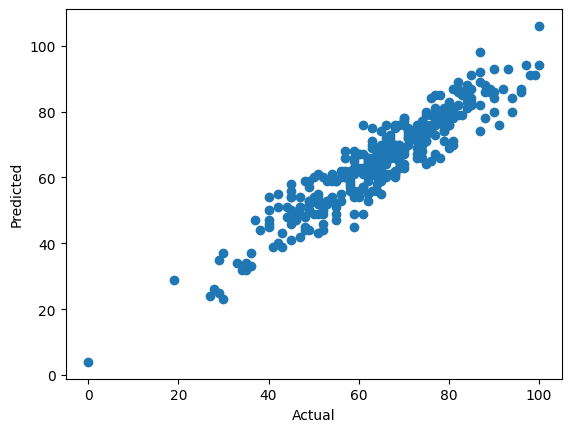

In [105]:
plt.scatter(y_test,pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

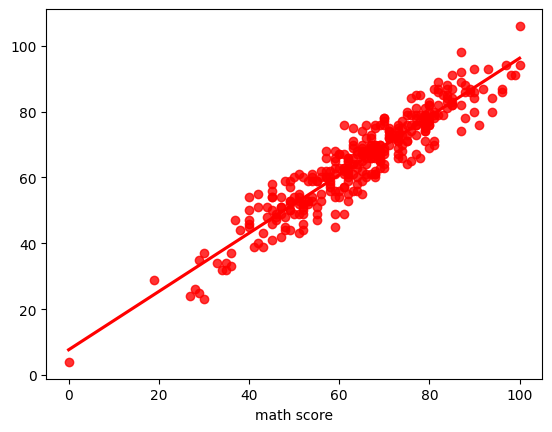

In [108]:
sns.regplot(x=y_test, y=pred_lr, ci=None, color='red')